### Exp 2

In [ ]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])

T = 2 # AND: 2, OR: 1, NOR: 0
W = np.array([1,1])

print("X1 X2 Out")
for x in X:
    g = x[0]*W[0] + x[1]*W[1]
    yi = 1 if g>=T else 0
    print(x[0], " ", x[1], " ", yi, end=" ")
    print("Neuron Activation" if yi else "Neuron stays deactivated")

X1 X2 Out
0   0   0 Neuron stays deactivated
0   1   0 Neuron stays deactivated
1   0   0 Neuron stays deactivated
1   1   1 Neuron Activation


### Exp 3

In [ ]:
import numpy as np

in_size = 4
hid_size1 = 6
hid_size2 = 6
out_size = 2

epochs = 1001
alpha = 0.001

X = np.random.randn(in_size, 100)
y = np.random.randint(0, 2, size=(out_size, 100))

W1 = np.random.randn(hid_size1, in_size) * np.sqrt(2/hid_size1)
b1 = np.random.randn(hid_size1, 1) # * np.sqrt(2/hid_size1)
W2 = np.random.randn(hid_size2, hid_size1) * np.sqrt(2/hid_size2)
b2 = np.random.randn(hid_size2, 1) # * np.sqrt(2/hid_size2)
W3 = np.random.randn(out_size, hid_size2) * np.sqrt(2/out_size)
b3 = np.random.randn(out_size, 1) # * np.sqrt(2/out_size)

def relU(z):
  return np.maximum(z, 0)

def relU_der(z):
  return z > 0

def softmax(z):
    return np.exp(z) / sum(np.exp(z))

def forward(W1, b1, W2, b2, W3, b3, X):
  Z1 = W1.dot(X) + b1
  A1 = relU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = relU(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  return Z1, A1, Z2, A2, Z3, A3

def loss(A3, y):
  return np.mean((y - A3)**2)

def backward(Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, X, y):
  dZ3 = A3 - y
  dW3 = dZ3.dot(A2.T) / 100
  db3 = np.sum(dZ3) / 100
  dZ2 = W3.T.dot(dZ3) * relU_der(Z2)
  dW2 = dZ2.dot(A1.T) / 100
  db2 = np.sum(dZ2) / 100
  dZ1 = W2.T.dot(dZ2) * relU_der(Z1)
  dW1 = dZ2.dot(X.T) / 100
  db1 = np.sum(dZ1) / 100

  W1 -= alpha * dW1
  b1 -= alpha * db1
  W2 -= alpha * dW2
  b2 -= alpha * db2
  W3 -= alpha * dW3
  b3 -= alpha * db3
  return W1, b1, W2, b2, W3, b3

def get_accuracy(A3, y):
  return np.mean(np.argmax(y, axis=0) == np.argmax(A3, axis=0))

for epoch in range(epochs):
  Z1, A1, Z2, A2, Z3, A3 = forward(W1, b1, W2, b2, W3, b3, X)
  l = loss(A3, y)
  W1, b1, W2, b2, W3, b3 = backward(Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, X, y)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Loss: {l}, Accuracy: {get_accuracy(A3, y)}")

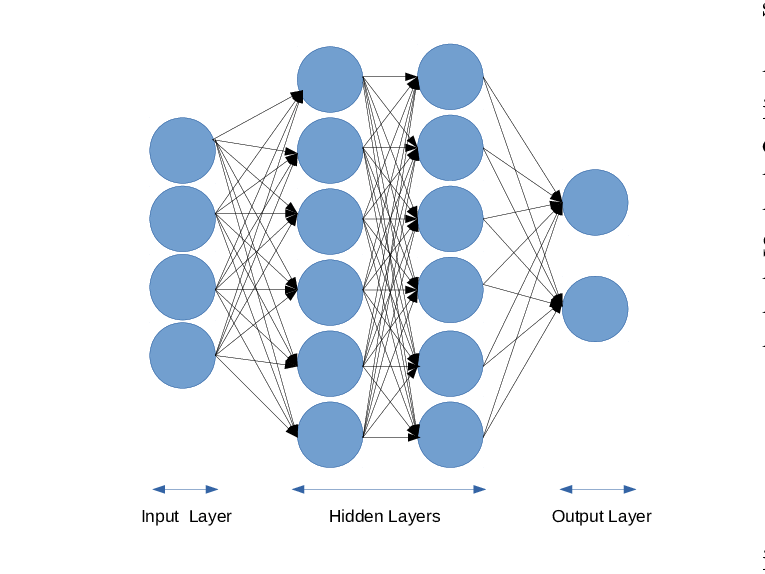

In [ ]:
def get_accuracy(A3, y):
  return np.sum(np.argmax(y, axis=0) == np.argmax(A3, axis=0))

for epoch in range(epochs):
  Z1, A1, Z2, A2, Z3, A3 = forward(W1, b1, W2, b2, W3, b3, X)
  l = loss(A3, y)
  W1, b1, W2, b2, W3, b3 = backward(Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, X, y)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Loss: {l}, Accuracy: {get_accuracy(A3, y)}")

Epoch: 0, Loss: 0.5149986971272347, Accuracy: 77
Epoch: 100, Loss: 0.3014909532615887, Accuracy: 78
Epoch: 200, Loss: 0.29173915485663365, Accuracy: 74
Epoch: 300, Loss: 0.28899114827137884, Accuracy: 75
Epoch: 400, Loss: 0.28695066447047657, Accuracy: 76
Epoch: 500, Loss: 0.2861579517069971, Accuracy: 76
Epoch: 600, Loss: 0.28561770417186233, Accuracy: 76
Epoch: 700, Loss: 0.2851983084168874, Accuracy: 76
Epoch: 800, Loss: 0.2848271262275395, Accuracy: 75
Epoch: 900, Loss: 0.28447473722579525, Accuracy: 74
Epoch: 1000, Loss: 0.28412099955081627, Accuracy: 74


# Exp 4

In [ ]:
import numpy as np
import pandas as pd
#dataset-link: https://drive.google.com/file/d/1jVbadSxE7eMnafvSYqfxLWFoGpN4E7va/view?usp=sharing
red_wine = pd.read_csv('winequality-red.csv')
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [ ]:
max_, min_ = df_train.max(axis=0), df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [ ]:
X_train, y_train = df_train.drop('quality', axis=1), df_train['quality']
X_valid, y_valid = df_valid.drop('quality', axis=1), df_valid['quality']

In [ ]:
X_train.shape

(1119, 11)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def make_model(act):
    model = keras.Sequential([
        keras.Input(shape=[11]),
        layers.Dense(512, activation=act),
        layers.Dense(512, activation=act),
        layers.Dense(512, activation=act),
        layers.Dense(1),
    ])
    model.compile(optimizer='adam', loss='mse')
    return model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=256,
        epochs=10,
    )

historySig = make_model('sigmoid')
historyRelu = make_model('relu')
historyTanh = make_model('tanh')
historySoft = make_model('softmax')

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 1.1268 - val_loss: 1.1119
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6012 - val_loss: 0.5849
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3657 - val_loss: 0.2536
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2468 - val_loss: 0.0275
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0630 - val_loss: 0.0968
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0691 - val_loss: 0.0711
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0642 - val_loss: 0.0282
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0330 - val_loss: 0.0437
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0362 - val_loss: 0.0369
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0354 - val_loss: 0.0284
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1536 - val_loss: 0.0286
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0306 - val_loss: 0.0350
Ep

<Axes: >

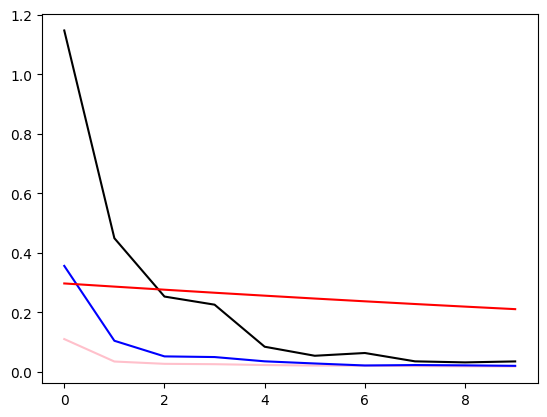

In [ ]:
# Sigmoid
history_df = pd.DataFrame(historySig.history)
history_df['loss'].plot(color='black')

# Relu
history_df = pd.DataFrame(historyRelu.history)
history_df['loss'].plot(color='pink')

# Tanh
history_df = pd.DataFrame(historyTanh.history)
history_df['loss'].plot(color='blue')

# Softmax
history_df = pd.DataFrame(historySoft.history)
history_df['loss'].plot(color='red')